## Kaggle DIJA 30 Stock Time Series

In [86]:
import os
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
os.listdir()

['.ipynb_checkpoints', 'archive.zip', 'kaggle_DJIA_30_Stock_Time_Series.ipynb']

In [5]:
file_save_path = os.path.join(os.getcwd(),"data")
file_name='archive.zip'
file_path = os.getcwd()

In [4]:
# Module to Extract file from a given path to a given path
def unzip_file(file_name,file_path, file_save_path):
    
    if not os.path.exists(file_save_path):
        os.makedirs(file_save_path)
    
    with ZipFile(os.path.join(file_path,file_name), 'r') as zipObj:
        print("Extracting the following files...",zipObj.namelist())
        zipObj.extractall(file_save_path)  

In [5]:
unzip_file(file_name,file_path, file_save_path)

Extracting the following files... ['AABA_2006-01-01_to_2018-01-01.csv', 'AAPL_2006-01-01_to_2018-01-01.csv', 'AMZN_2006-01-01_to_2018-01-01.csv', 'AXP_2006-01-01_to_2018-01-01.csv', 'BA_2006-01-01_to_2018-01-01.csv', 'CAT_2006-01-01_to_2018-01-01.csv', 'CSCO_2006-01-01_to_2018-01-01.csv', 'CVX_2006-01-01_to_2018-01-01.csv', 'DIS_2006-01-01_to_2018-01-01.csv', 'GE_2006-01-01_to_2018-01-01.csv', 'GOOGL_2006-01-01_to_2018-01-01.csv', 'GS_2006-01-01_to_2018-01-01.csv', 'HD_2006-01-01_to_2018-01-01.csv', 'IBM_2006-01-01_to_2018-01-01.csv', 'INTC_2006-01-01_to_2018-01-01.csv', 'JNJ_2006-01-01_to_2018-01-01.csv', 'JPM_2006-01-01_to_2018-01-01.csv', 'KO_2006-01-01_to_2018-01-01.csv', 'MCD_2006-01-01_to_2018-01-01.csv', 'MMM_2006-01-01_to_2018-01-01.csv', 'MRK_2006-01-01_to_2018-01-01.csv', 'MSFT_2006-01-01_to_2018-01-01.csv', 'NKE_2006-01-01_to_2018-01-01.csv', 'PFE_2006-01-01_to_2018-01-01.csv', 'PG_2006-01-01_to_2018-01-01.csv', 'TRV_2006-01-01_to_2018-01-01.csv', 'UNH_2006-01-01_to_2018-01-

## Stock Study - APPLE

In [6]:
def extract_file(file_save_path,file_name='all'):
    list_of_files = os.listdir(file_save_path)
    
    file_path_list =[]
    
    for file in list_of_files:
        file_name_temp=file.split("_")
        if file_name_temp[0].lower()==file_name.lower():
            file_path_list.append(file)
            

    return file_path_list

In [9]:
files = extract_file(file_save_path,file_name='AAPL')

In [10]:
files

['AAPL_2006-01-01_to_2018-01-01.csv']

In [20]:
df_wrk = pd.read_csv(os.path.join(file_save_path,files[0]))

In [21]:
df_wrk.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [27]:
df_wrk['Date']=pd.to_datetime(df_wrk['Date'],format="%Y-%m-%d")

In [32]:
df_wrk.set_index("Date",inplace=True)

In [16]:
def plot_stk(df,column,title=None):
    df[column].plot(kind="line",color='b',figsize=(12,8))
    plt.title(title)
    plt.show()

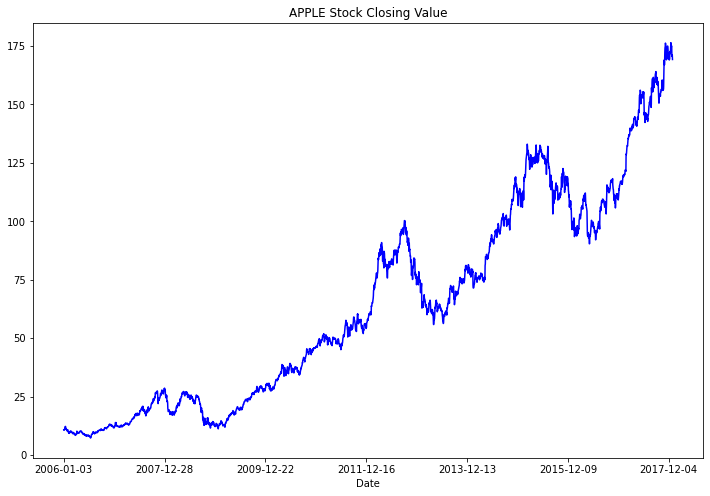

In [19]:
plot_stk(df_wrk,'Close',title="APPLE Stock Closing Value")

In [33]:
df_wrk.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08


In [37]:
## Preparing Train and Test Dataset
train=df_wrk[:'2016']
test=df_wrk['2017':]

In [39]:
train.shape, test.shape

((2768, 6), (251, 6))

In [41]:
# Plotting the Auto Correlation graph to understand the order of differencing
def plot_acf_w_diff(df,no_of_diff,col_name):
    plt.rcParams.update({'figure.figsize':(9,12), 'figure.dpi':120})
    fig,ax=plt.subplots(no_of_diff+1,2,sharex=False)
    for i in range(0,no_of_diff+1):
        if i==0:
            ax[i,0].plot(df[col_name])
            ax[i,0].set_title("Original Series")
            plot_acf(df[col_name],ax=ax[i,1])
        else:
            ax[i,0].plot(df[col_name].diff(i).dropna())                         
            ax[i,0].set_title("Order {} differencing".format(i))
            plot_acf(df[col_name].diff(i).dropna(),ax=ax[i,1])
    plt.show()

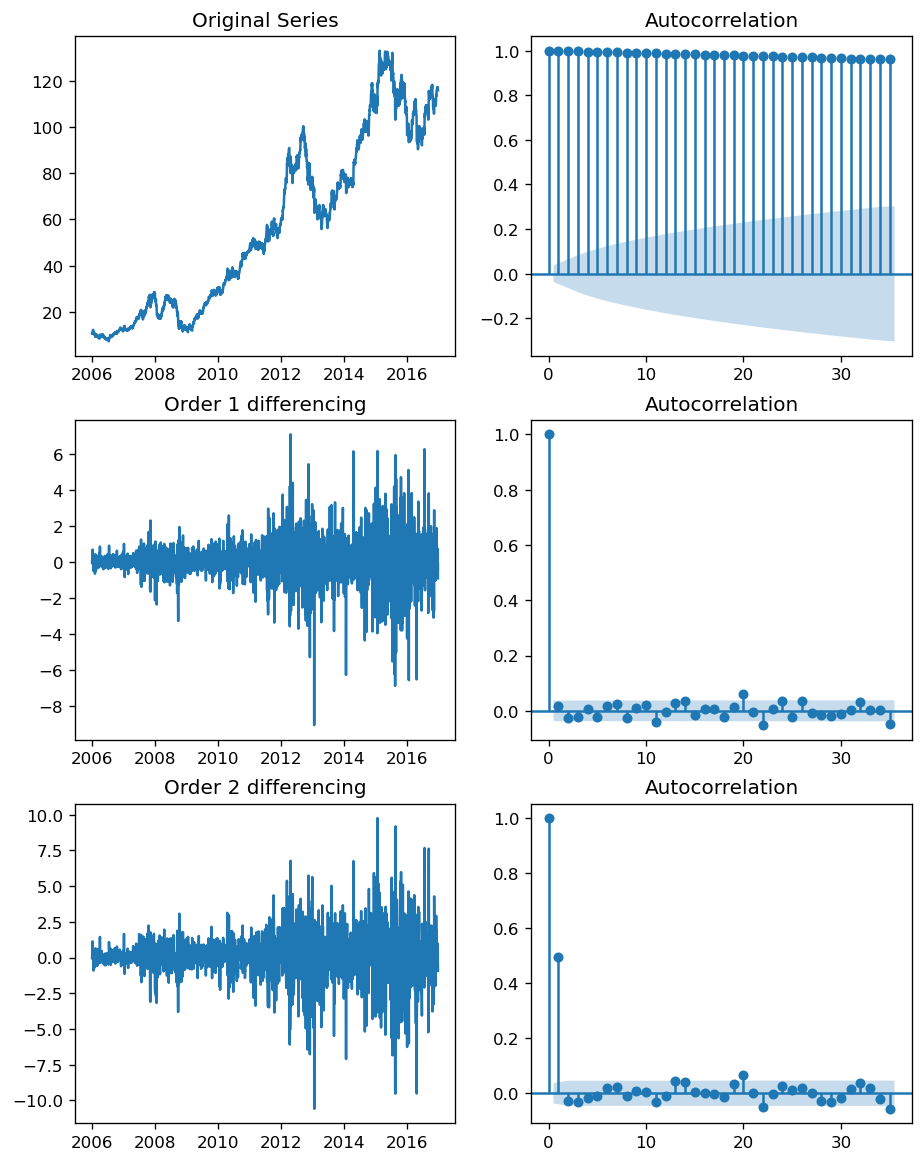

In [42]:
plot_acf_w_diff(train,2,"Close")

### Thoughts
    1. Here we can see that, there is drastic fall on the Auto Correlation co-efficient of its lagged value. 
    2. Majority of the co-efficient is seen with in the significance zone.
    3. At differencing order 1 - No of lag required can be approximately determined to be 1.
    4. To be sure we need to conduct ADF test.
    5. ADf test with differecing 1, should prove the series to be stationary.
    6. No. of MA terms (q) can be considered 1

In [44]:
def adf_test(time_sr):    
    result = adfuller (time_sr)
    adf_dict={"Test Statistic":result[0],"p-value":result[1],"Usedlag":result[2],"No.of Obs":result[3],
          "Critical Values at Sig. Level ":result[4]}
    print(adf_dict)

In [45]:
# ADF test of the stock close value without differenciation
adf_test(train["Close"])

{'Test Statistic': -0.46656690938602574, 'p-value': 0.8983772767918803, 'Usedlag': 0, 'No.of Obs': 2767, 'Critical Values at Sig. Level ': {'1%': -3.4327155138680454, '5%': -2.8625851157957265, '10%': -2.5673263480950106}}


In [46]:
#ADF test of the stock close value with 1st Order differenciation
adf_test(train["Close"].diff().dropna())

{'Test Statistic': -51.63077115052399, 'p-value': 0.0, 'Usedlag': 0, 'No.of Obs': 2766, 'Critical Values at Sig. Level ': {'1%': -3.432716369874773, '5%': -2.8625854938408413, '10%': -2.5673265493658404}}


### Thoughts
    1. We can see from above, that p-value (0.0) is less than 0.05, hence we can reject the null hypothesis(H0).
    2. We can say that the series is Stationary at 1st order differenciation. 
    3. We now need to be determine the order of AR co-effcients, using pacf

In [47]:
def plot_pacf_w_diff(df,no_of_diff,col_name):
    plt.rcParams.update({'figure.figsize':(11,12), 'figure.dpi':120})
    fig,ax=plt.subplots(no_of_diff+1,2,sharex=False)
    for i in range(0,no_of_diff+1):
        if i==0:
            ax[i,0].plot(range(0,df.shape[0]),df[col_name])
            ax[i,0].set_title("Original Series")
            plot_pacf(df[col_name],ax=ax[i,1])
        else:
            ax[i,0].plot(range(0,df[col_name].diff(i).dropna().shape[0]),df[col_name].diff(i).dropna())                         
            ax[i,0].set_title("Order {} differencing".format(i))
            plot_pacf(df[col_name].diff(i).dropna(),ax=ax[i,1])
    plt.show()

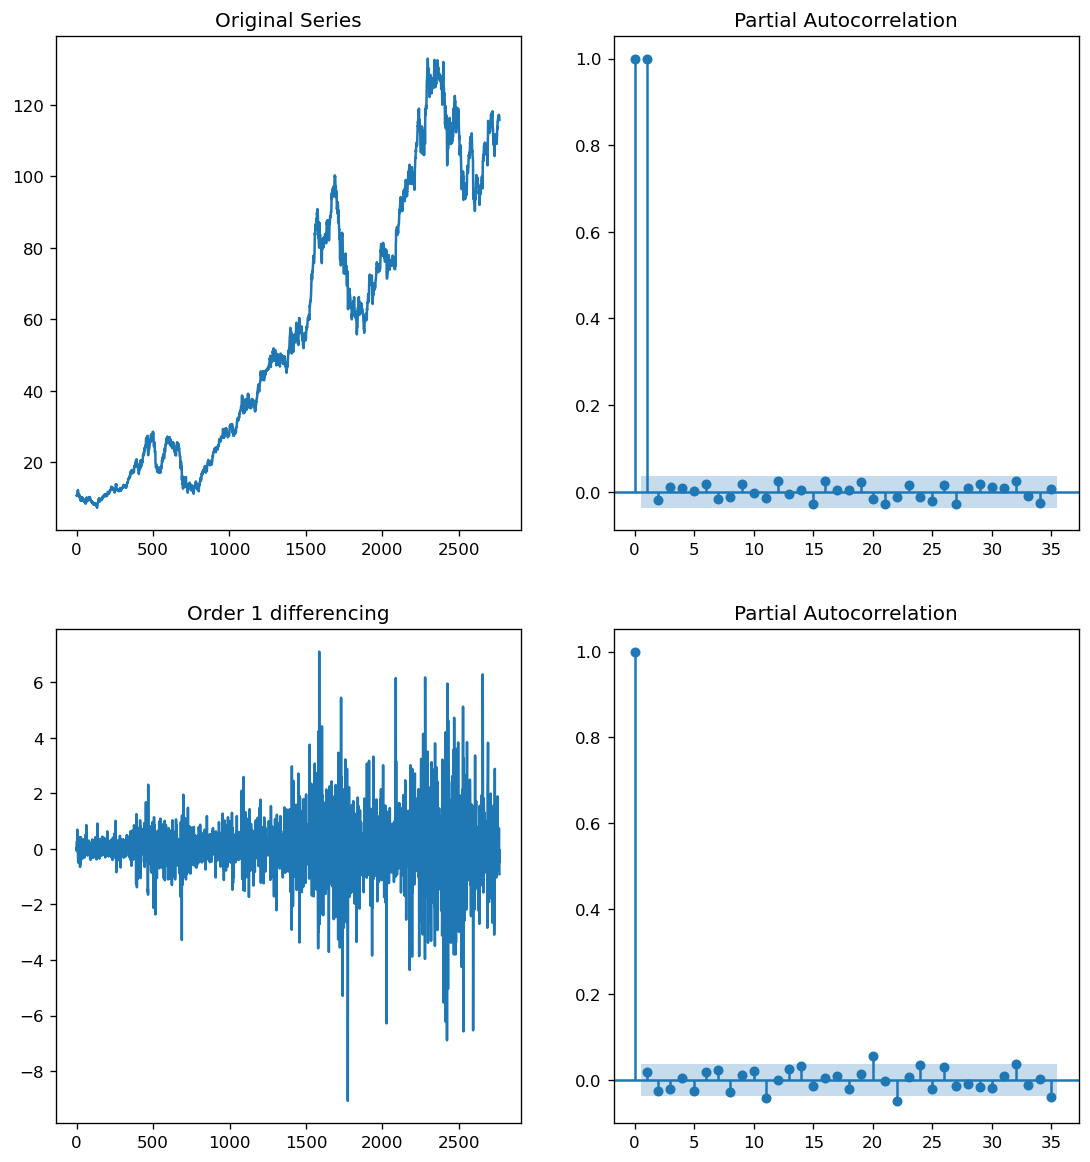

In [48]:
plot_pacf_w_diff(train,1,"Close")

### Thoughts
    1. Partial auto correlation after 1st order differencing (Stationary Series), we can see one co-effcient having value higher than the significant value.
    2. p - can be considered to be 1
   

In [ ]:
# SARIMAX Model - Weekwise
sarima_model = pm.auto_arima(train['Close'],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=2, max_q=2, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarima_model.summary()

### Weekwise Aggregation
     1. Lets take week wise mean of all values in the df and check Stationarity, ACF and PACF

In [52]:
train_week_mean=train.resample('W').mean()
train_week_mean.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-08,10.6275,10.7975,10.5375,10.730,1.614035e+08
2006-01-15,11.6220,11.8940,11.4980,11.734,3.253707e+08
2006-01-22,11.7625,11.8625,11.4375,11.510,3.053074e+08
2006-01-29,10.8500,11.0160,10.5160,10.636,2.807641e+08
2006-02-05,10.5440,10.7880,10.3520,10.566,2.116522e+08


In [53]:
# SARIMAX Model - Weekwise
sarima_model = pm.auto_arima(train_week_mean['Close'],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=1, start_Q=1,seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=3.81 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3979.238, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2547.171, Time=1.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3348.046, Time=1.17 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4015.453, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2695.029, Time=0.27 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2479.108, Time=2.78 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.30 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3970.817, Time=2.74 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2430.610, Time=3.06 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=2493.293, Time=1.50 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=10.98 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  574
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood               -1206.248
Date:                             Mon, 08 Aug 2022   AIC                           2422.496
Time:                                     20:20:33   BIC                           2444.154
Sample:                                          0   HQIC                          2430.952
                                             - 574                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9710      0.009    110.322      0.000       0.954       0.988
ma.L1          0.3437      0.032     10.639      0.000       0.280       0.407
ar.S.L12      -0.6436      0.035    -18.635      0.000      -0.711      -0.576
ar.S.L24      -0.3328      0.035     -9.492      0.000      -0.402      -0.264
sigma2         4.2186      0.209     20.209      0.000       3.810       4.628
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                27.95
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               7.96   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Monthwise Aggregation
     1. Lets take month wise mean of all values in the df and check Stationarity, ACF and PACF

In [54]:
train_mon_mean=train.resample('M').mean()
train_mon_mean.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-31,11.144000,11.352000,10.931500,11.115500,2.737752e+08
2006-02-28,10.011579,10.164737,9.760000,9.930526,2.469824e+08
2006-03-31,9.229565,9.336522,9.034348,9.146957,2.521987e+08
2006-04-30,9.594211,9.733158,9.424211,9.572632,2.648837e+08
2006-05-31,9.642273,9.728636,9.435000,9.540455,1.775120e+08


In [55]:
# SARIMAX Model - Weekwise
sarima_model_mon = pm.auto_arima(train_mon_mean['Close'],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=1, start_Q=1,seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarima_model_mon.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=805.864, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=779.729, Time=0.14 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=790.818, Time=0.05 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=766.922, Time=0.33 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=1.79 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(0,2,0)(2,1,0)[12]             : AIC=777.543, Time=0.25 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=754.713, Time=0.45 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=774.531, Time=0.18 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=2.77 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=1.00 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=748.076, Time=0.53 sec
 ARIMA(3,2,0)(1,1,0)[12]             : AIC=765.359, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 2, 1)x(2, 1, [], 12)   Log Likelihood                -361.261
Date:                             Mon, 08 Aug 2022   AIC                            736.522
Time:                                     20:23:29   BIC                            755.917
Sample:                                          0   HQIC                           744.397
                                             - 132                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0757      0.155      0.490      0.624      -0.227       0.379
ar.L2         -0.2458      0.104     -2.353      0.019      -0.451      -0.041
ar.L3         -0.1156      0.109     -1.065      0.287      -0.328       0.097
ma.L1         -0.7260      0.123     -5.881      0.000      -0.968      -0.484
ar.S.L12      -0.6712      0.075     -8.916      0.000      -0.819      -0.524
ar.S.L24      -0.5208      0.106     -4.923      0.000      -0.728      -0.313
sigma2        24.2570      2.982      8.134      0.000      18.412      30.102
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.28
Prob(Q):                              0.88   Prob(JB):                         0.07
Heteroskedasticity (H):               8.26   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Seasonal Decomposition - Daywise

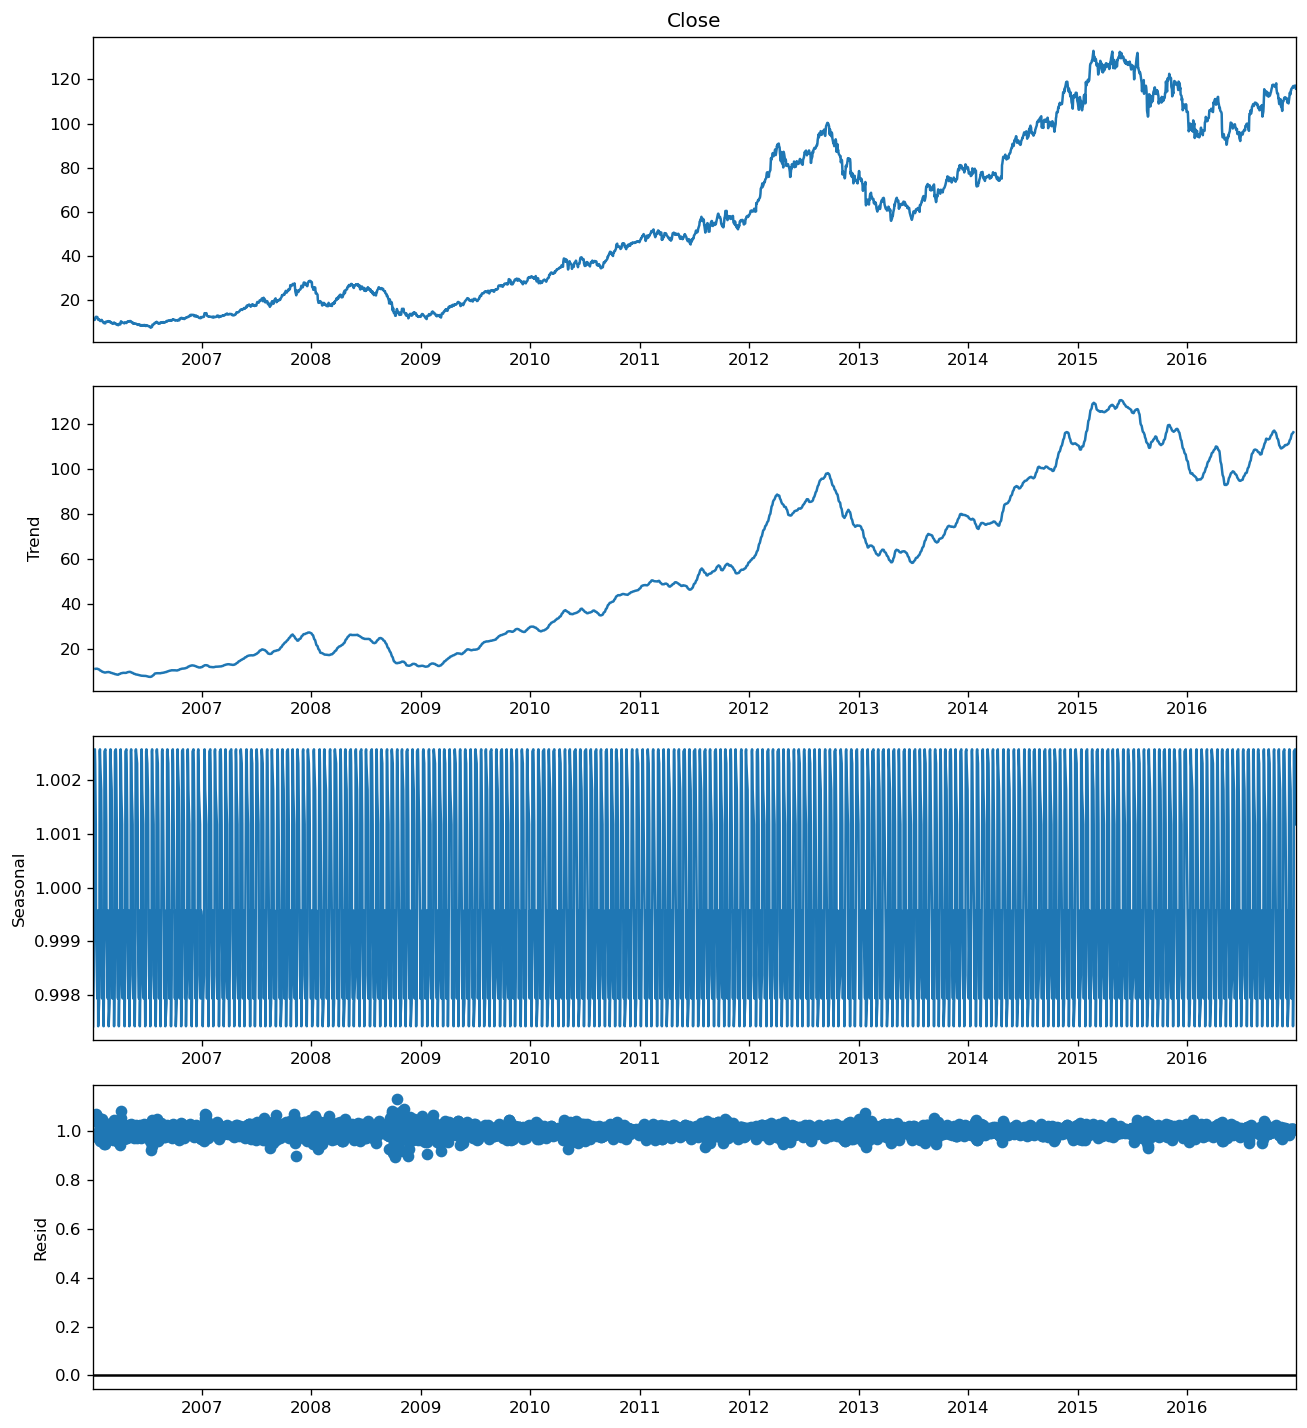

In [59]:
result_mul = seasonal_decompose(train["Close"],model='multiplicative',period=12)
result_mul.plot()
plt.show()

### Seasonal Decomposition - Weekwise

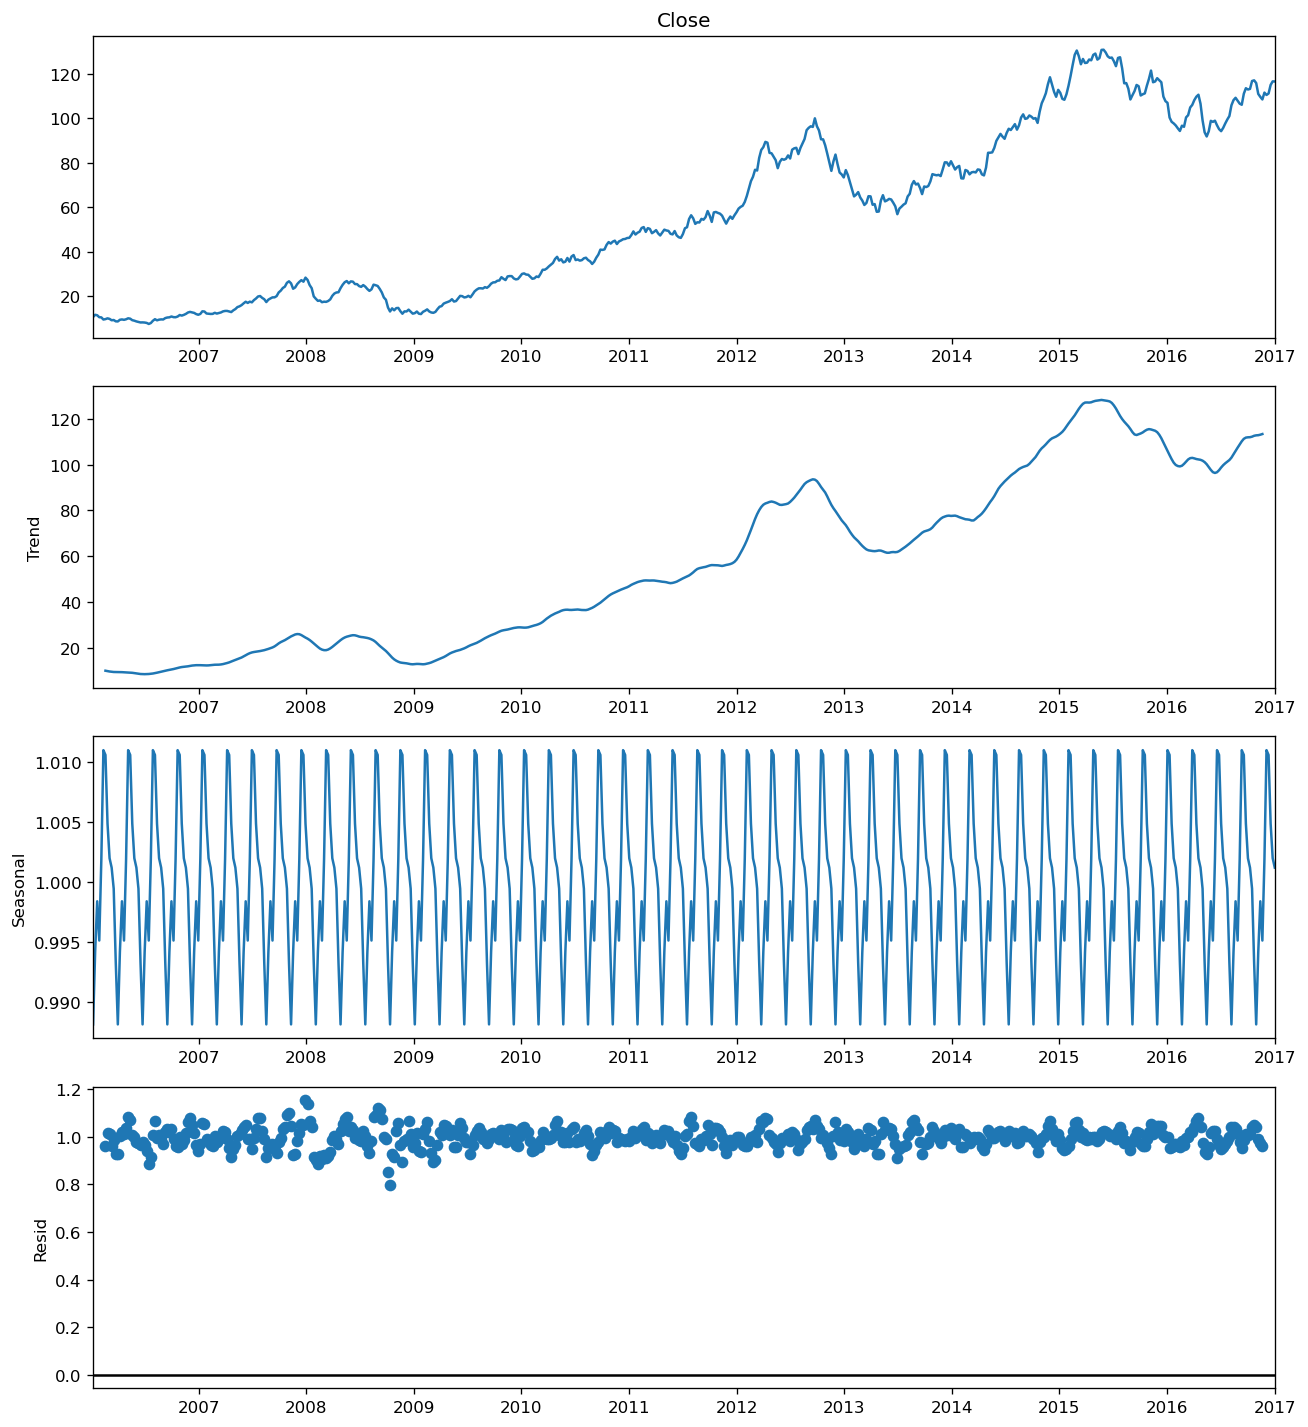

In [60]:
result_mul= seasonal_decompose(train_week_mean["Close"],model='multiplicative',period=12)
result_mul.plot()
plt.show()

### Seasonal Decomposition - Monthwise

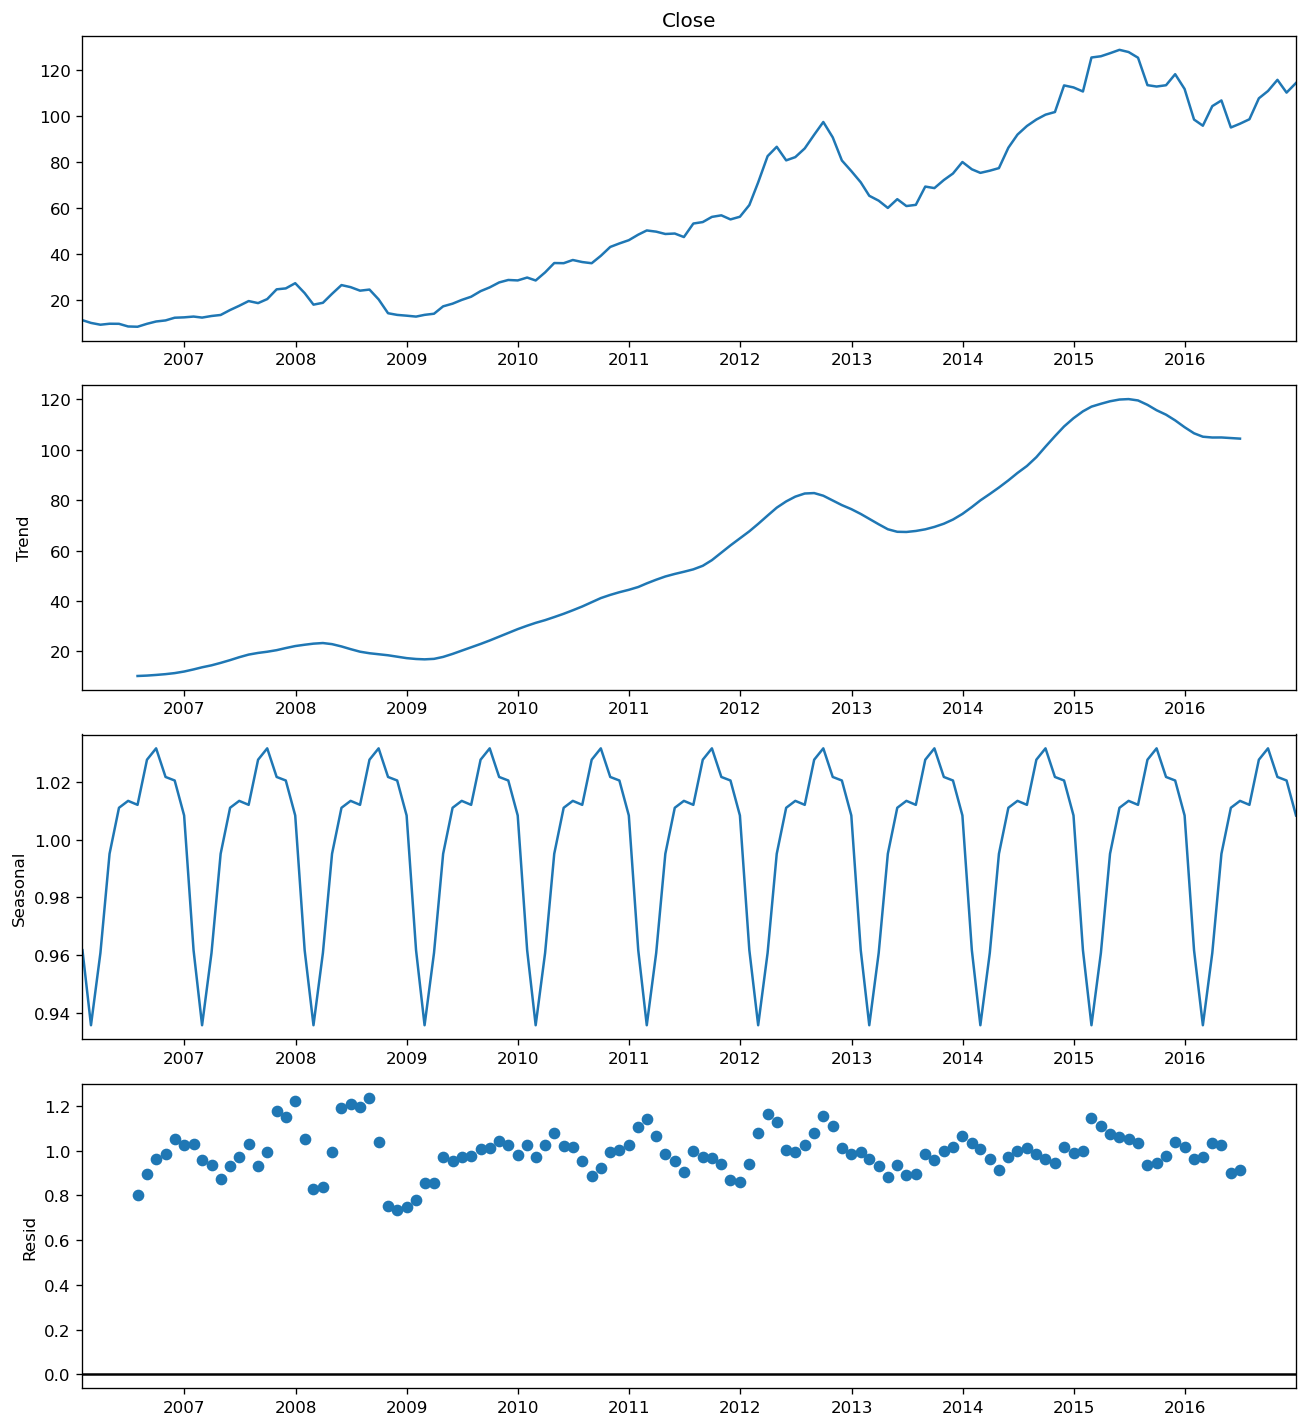

In [62]:
result_mul= seasonal_decompose(train_mon_mean["Close"],model='multiplicative',period=12)
result_mul.plot()
plt.show()

#### Thoughts
    1. Residual pattern for weekwise aggregation show points better centered around 1 than month wise.
    2. In daywise also the centering in better tha week wise.

In [63]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
   
    return(mape,mae,rmse)

In [69]:
def plot_eval_prediction(model,trn_df,tst_df,freq):
    period=tst_df.shape[0]
    fitted,conf_int=model.predict(n_periods=period,return_conf_int=True)
    index_fc=tst_df.index
    fitted_sr=pd.Series(fitted,index=index_fc)
    lower_ci=pd.Series(conf_int[:,0],index=index_fc)
    upper_ci=pd.Series(conf_int[:,1],index=index_fc)
    
    # Plotting Data
    plt.figure(figsize=(12,8))
    plt.plot(trn_df["Close"])
    plt.plot(tst_df["Close"],color="red",label="Actual")
    plt.plot(fitted_sr,color="darkgreen",label="Predicted")
    plt.fill_between(lower_ci.index, 
                 lower_ci, 
                 upper_ci, 
                 color='k', alpha=.15)
    
    plt.title("SARIMA - Final Prediction of APPLE Stock Closing price - Frequency {}".format(freq))
    plt.legend()
    plt.show()
    
    mape,mae,rmse=forecast_accuracy(fitted_sr.values,tst_df["Close"])
    
    print("MAPE: ",round(mape,3))
    print("Accuracy: ",round(1-mape,3))
    print("MAE: ",round(mae,3))
    print("RMSE: ",round(rmse,3))
    

In [65]:
# Resampling the Test Data
test_day_wise=test
test_week_wise=test.resample('W').mean()
test_month_wise=test.resample('M').mean()

#### Prediction -  Weekly averaging

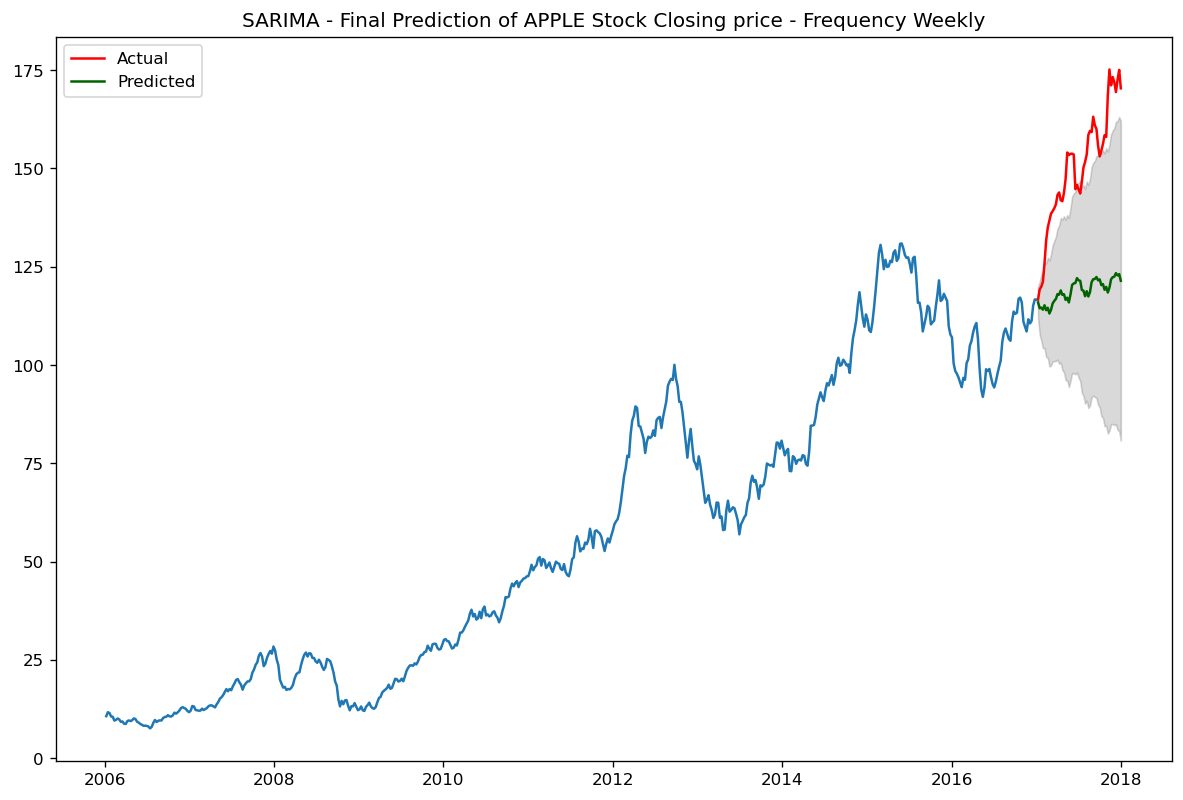

MAPE:  0.203
Accuracy:  0.797
MAE:  31.546
RMSE:  34.004


In [70]:
plot_eval_prediction(sarima_model,train_week_mean,test_week_wise,"Weekly")

#### Prediction -  Monthly averaging

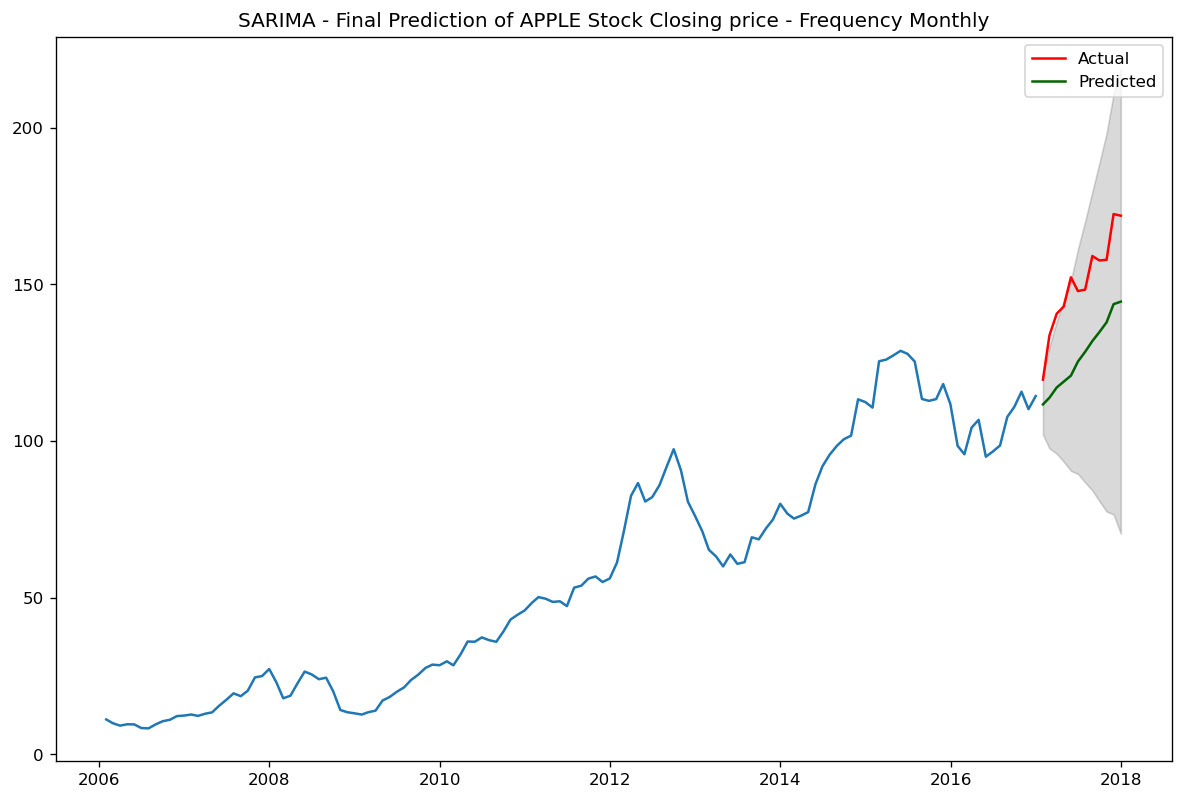

MAPE:  0.151
Accuracy:  0.849
MAE:  22.937
RMSE:  23.648


In [71]:
plot_eval_prediction(sarima_model_mon,train_mon_mean,test_month_wise,"Monthly")

### Thoughts
    1. Monthwise aggregation gives the lowest MAPE and highest accuracy of 0.151 and 84.9%
    2. The model may be improved thru incorporation of exogenous variables - to make it a multivariate analysis.
    
    Now introducing sarimax model to incorporate the monthly seasonality as exogenous variable input.

In [72]:
result_mul_weekwise= seasonal_decompose(train_week_mean[['Close']],model='multiplicative',period=12,extrapolate_trend='freq')
seasn_weekwise = result_mul_weekwise.seasonal

In [73]:
seasn_weekwise=pd.DataFrame(seasn_weekwise).reset_index()

In [76]:
# SARIMAX Model - Weekwise
sarima__week_model = pm.auto_arima(train_week_mean[['Close']], exogenous=seasn_weekwise[['seasonal']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarima__week_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=4.93 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3981.238, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2549.171, Time=1.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3350.046, Time=1.54 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4017.453, Time=0.27 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2697.029, Time=0.31 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2481.108, Time=3.35 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=10.11 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.89 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3972.817, Time=2.57 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2432.610, Time=2.74 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=2495.293, Time=1.28 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.49 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.20 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  574
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood               -1206.248
Date:                             Mon, 08 Aug 2022   AIC                           2424.496
Time:                                     20:59:10   BIC                           2450.485
Sample:                                          0   HQIC                          2434.643
                                             - 574                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
seasonal    8.989e-07   7.16e+04   1.25e-11      1.000    -1.4e+05     1.4e+05
ar.L1          0.9710      0.009    110.130      0.000       0.954       0.988
ma.L1          0.3437      0.032     10.639      0.000       0.280       0.407
ar.S.L12      -0.6436      0.035    -18.635      0.000      -0.711      -0.576
ar.S.L24      -0.3328      0.035     -9.492      0.000      -0.402      -0.264
sigma2         4.2186      0.209     20.209      0.000       3.809       4.628
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                27.95
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               7.96   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
def sarimax_plot_eval_prediction(model,trn_df,tst_df,exogen_data,seasonal_freq,freq):
    period=tst_df.shape[0]
    #prepof exogenous data
    no_of_repeat=(tst_df.shape[0])//seasonal_freq
    addin_period=(tst_df.shape[0])%seasonal_freq
    no_of_repeat_dt=np.tile(exogen_data[["seasonal"]][-seasonal_freq:].values,no_of_repeat).reshape(-1,1)
    add_period_dt=exogen_data[["seasonal"]][:addin_period].values
    exogn_dt=np.append(no_of_repeat_dt,add_period_dt,0)
    
    
    fitted,conf_int=model.predict(n_periods=period,exogenous=exogn_dt,return_conf_int=True)
    index_fc=tst_df.index
    fitted_sr=pd.Series(fitted,index=index_fc)
    lower_ci=pd.Series(conf_int[:,0],index=index_fc)
    upper_ci=pd.Series(conf_int[:,1],index=index_fc)
    
    # Plotting Data
    plt.figure(figsize=(12,8))
    plt.plot(trn_df["Close"])
    plt.plot(tst_df["Close"],color="red",label="Actual")
    plt.plot(fitted_sr,color="darkgreen",label="Predicted")
    plt.fill_between(lower_ci.index, 
                 lower_ci, 
                 upper_ci, 
                 color='k', alpha=.15)
    
    plt.title("SARIMA - Final Prediction of APPLE Stock Closing price - Frequency {}".format(freq))
    plt.legend()
    plt.show()
    
    mape,mae,rmse=forecast_accuracy(fitted_sr.values,tst_df["Close"])
    
    print("MAPE: ",round(mape,3))
    print("Accuracy: ",round(1-mape,3))
    print("MAE: ",round(mae,3))
    print("RMSE: ",round(rmse,3))

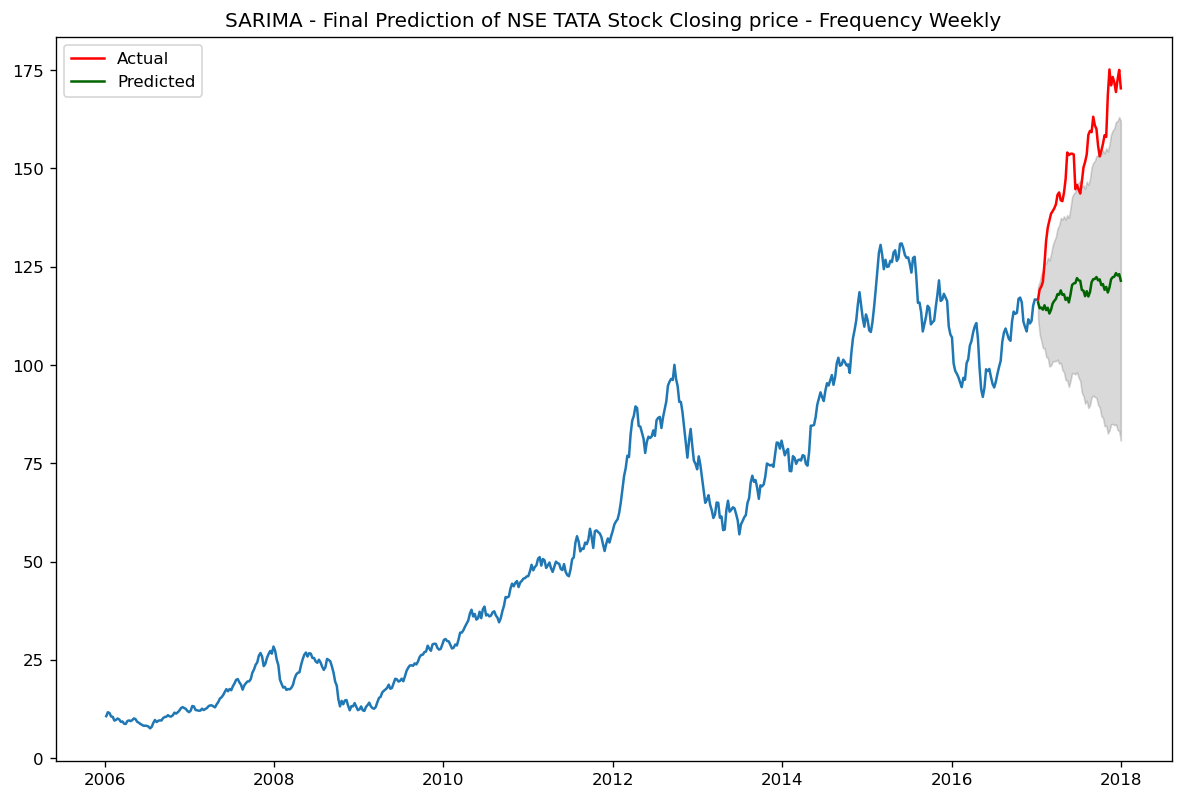

MAPE:  0.203
Accuracy:  0.797
MAE:  31.546
RMSE:  34.004


In [88]:
sarimax_plot_eval_prediction(sarima__week_model,train_week_mean,test_week_wise,seasn_weekwise[['seasonal']],12,"Weekly")

In [79]:
result_mul_monthwise= seasonal_decompose(train_mon_mean[['Close']],model='multiplicative',period=12,extrapolate_trend='freq')
seasn_monthwise = result_mul_monthwise.seasonal

In [82]:
seasn_monthwise=pd.DataFrame(seasn_monthwise)

,seasonal
Date,
2006-01-31,1.042540
2006-02-28,0.978499
2006-03-31,0.973806
2006-04-30,0.997460
2006-05-31,1.000828
...,...
2016-08-31,1.006066
2016-09-30,1.014224
2016-10-31,1.011865


In [84]:
# SARIMAX Model - Monthwise
sarimax__month_model = pm.auto_arima(train_mon_mean[['Close']], exogenous=seasn_monthwise[['seasonal']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarimax__month_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=777.810, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=750.229, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=767.412, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=730.422, Time=0.48 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.89 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=734.962, Time=0.33 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=730.420, Time=0.62 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=752.178, Time=0.30 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.68 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=732.350, Time=0.71 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=2.94

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -359.210
Date:                            Mon, 08 Aug 2022   AIC                            730.420
Time:                                    21:07:08   BIC                            747.095
Sample:                                01-31-2006   HQIC                           737.191
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
seasonal    3.167e-07   2.06e+05   1.53e-12      1.000   -4.05e+05    4.05e+05
ar.L1          0.2611      0.082      3.182      0.001       0.100       0.422
ar.L2         -0.1407      0.098     -1.432      0.152      -0.333       0.052
ar.S.L12      -0.6820      0.090     -7.605      0.000      -0.858      -0.506
ar.S.L24      -0.5159      0.097     -5.339      0.000      -0.705      -0.327
sigma2        22.4942      2.712      8.293      0.000      17.178      27.810
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.73
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               8.66   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

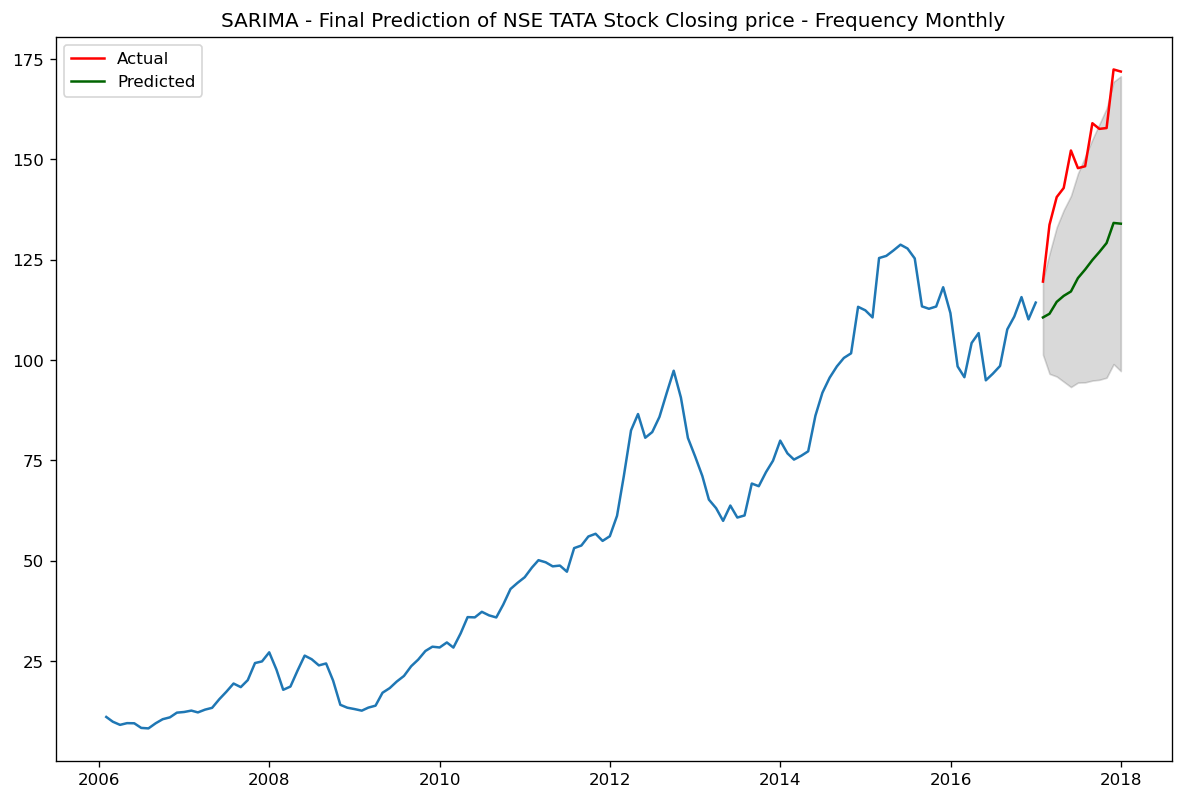

MAPE:  0.186
Accuracy:  0.814
MAE:  28.485
RMSE:  29.496


In [85]:
sarimax_plot_eval_prediction(sarimax__month_model,train_mon_mean,test_month_wise,seasn_monthwise[['seasonal']],12,"Monthly")

#### Thoughts
    * Model with SARIMA gave better result with monthwise aggregation
    * SARIMA monthwise: RMSE -23.648, SARIMAX - 29.496
    * SARIMA monthwise: Accuracy - 0.849, SARIMAX - Accuracy - 0.814